In [1]:
import pandas as pd

In [108]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [109]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [110]:
data.shape

(400, 5)

In [111]:
x = data.iloc[ :, [2, 3] ]
y = data.iloc[ :, 4 ]

In [112]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [113]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2 )

In [116]:
print( x_train.shape )
x_train.head()

(320, 2)


,Age,EstimatedSalary
116,35,75000
60,27,20000
218,46,96000
145,24,89000
19,48,29000


In [117]:
print( x_test.shape )
x_test.head()

(80, 2)


,Age,EstimatedSalary
319,36,60000
178,24,23000
76,18,52000
321,53,82000
98,35,73000


In [118]:
print( y_train.shape )
y_train.head()

(320,)


116    0
60     0
218    0
145    0
19     1
Name: Purchased, dtype: int64

In [119]:
print( y_test.shape )
y_test.head()

(80,)


319    0
178    0
76     0
321    1
98     0
Name: Purchased, dtype: int64

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
ssc = StandardScaler()

In [122]:
x_train = ssc.fit_transform( x_train )

In [123]:
x_test = ssc.fit_transform( x_test )

In [124]:
x_train

array([[-0.23758045,  0.13365771],
       [-0.99124333, -1.47096413],
       [ 0.79870601,  0.7463315 ],
       [-1.27386691,  0.5421069 ],
       [ 0.98712173, -1.20838965],
       [ 0.13925099,  1.85497932],
       [ 0.32766671, -0.53736597],
       [-0.70861975, -1.55848896],
       [ 0.42187457, -0.18726666],
       [ 0.51608243,  1.21313058],
       [ 1.55236889,  0.97973104],
       [ 0.13925099, -0.8291154 ],
       [ 0.23345885,  0.04613288],
       [ 0.98712173, -1.09168988],
       [ 0.13925099,  0.01695794],
       [-0.80282761,  0.36705725],
       [ 1.55236889, -1.29591448],
       [-1.08545119,  1.38818024],
       [ 1.92920033, -0.68324069],
       [-1.74490621, -1.44178919],
       [ 0.32766671,  0.04613288],
       [-0.04916473,  1.94250414],
       [-0.04916473, -0.44984115],
       [ 0.70449815, -1.41261425],
       [-0.70861975, -0.6248908 ],
       [-0.99124333,  0.39623219],
       [ 1.64657675, -0.91664023],
       [ 1.08132959, -0.15809172],
       [-0.14337259,

In [125]:
x_test

array([[-0.22207567, -0.21316353],
       [-1.44031938, -1.33388122],
       [-2.04944123, -0.45548087],
       [ 1.50376957,  0.45320915],
       [-0.32359598,  0.18060214],
       [ 2.21441173, -0.75837754],
       [-1.23727876, -0.97040521],
       [ 0.79312741,  0.36234014],
       [ 1.09768834,  0.21089181],
       [-1.13575845, -1.51561922],
       [-1.13575845, -0.30403253],
       [ 2.11289142, -0.75837754],
       [ 0.18400556, -0.30403253],
       [ 0.79312741, -0.2434532 ],
       [-1.03423814, -0.2434532 ],
       [ 0.18400556,  0.12002281],
       [-0.32359598,  0.15031247],
       [ 0.38704618,  1.24074049],
       [ 1.8083305 ,  1.99798217],
       [-0.72967722, -0.03142553],
       [ 1.40224926,  0.69552648],
       [ 2.11289142,  1.90711317],
       [ 0.89464772, -1.27330189],
       [-1.03423814, -0.90982588],
       [ 0.18400556, -0.30403253],
       [ 0.18400556, -0.21316353],
       [ 0.28552587,  0.15031247],
       [-0.12055537,  0.21089181],
       [ 1.09768834,

In [126]:
import matplotlib.pyplot as plt

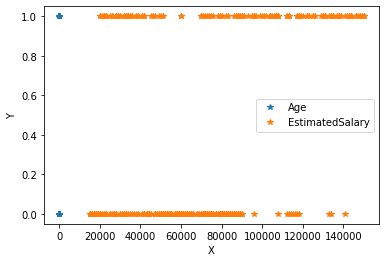

In [127]:
plt.plot( x['Age'], y, linestyle = '', marker = '*', label = 'Age' )
plt.plot( x['EstimatedSalary'], y, linestyle = '', marker = '*', label = 'EstimatedSalary' )
plt.xlabel( 'X' )
plt.ylabel('Y')
plt.legend( loc = 'best' )
plt.show()

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
lr = LogisticRegression()

In [130]:
lr.fit( x_train, y_train )

C:\Users\gauta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
y_pred_before_kpca = lr.predict( x_test )
y_pred_before_kpca

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [132]:
x_test

array([[-0.22207567, -0.21316353],
       [-1.44031938, -1.33388122],
       [-2.04944123, -0.45548087],
       [ 1.50376957,  0.45320915],
       [-0.32359598,  0.18060214],
       [ 2.21441173, -0.75837754],
       [-1.23727876, -0.97040521],
       [ 0.79312741,  0.36234014],
       [ 1.09768834,  0.21089181],
       [-1.13575845, -1.51561922],
       [-1.13575845, -0.30403253],
       [ 2.11289142, -0.75837754],
       [ 0.18400556, -0.30403253],
       [ 0.79312741, -0.2434532 ],
       [-1.03423814, -0.2434532 ],
       [ 0.18400556,  0.12002281],
       [-0.32359598,  0.15031247],
       [ 0.38704618,  1.24074049],
       [ 1.8083305 ,  1.99798217],
       [-0.72967722, -0.03142553],
       [ 1.40224926,  0.69552648],
       [ 2.11289142,  1.90711317],
       [ 0.89464772, -1.27330189],
       [-1.03423814, -0.90982588],
       [ 0.18400556, -0.30403253],
       [ 0.18400556, -0.21316353],
       [ 0.28552587,  0.15031247],
       [-0.12055537,  0.21089181],
       [ 1.09768834,

In [133]:
x_test.T

array([[-0.22207567, -1.44031938, -2.04944123,  1.50376957, -0.32359598,
         2.21441173, -1.23727876,  0.79312741,  1.09768834, -1.13575845,
        -1.13575845,  2.11289142,  0.18400556,  0.79312741, -1.03423814,
         0.18400556, -0.32359598,  0.38704618,  1.8083305 , -0.72967722,
         1.40224926,  2.11289142,  0.89464772, -1.03423814,  0.18400556,
         0.18400556,  0.28552587, -0.12055537,  1.09768834,  0.99616803,
        -0.22207567, -0.32359598, -1.33879907,  0.79312741,  0.89464772,
        -1.44031938, -0.32359598, -0.22207567, -1.64335999, -0.32359598,
         2.01137111, -0.22207567, -0.12055537,  0.08248525, -0.32359598,
        -0.42511629, -1.23727876, -1.23727876, -1.23727876,  0.6916071 ,
        -0.93271783, -0.22207567, -1.03423814, -0.42511629,  2.21441173,
         0.99616803,  0.89464772, -0.32359598, -1.33879907,  1.09768834,
         0.79312741, -0.01903506,  0.18400556, -0.72967722,  0.08248525,
        -0.42511629, -0.62815691, -0.5266366 , -1.1

In [134]:
x_test.T[0]

array([-0.22207567, -1.44031938, -2.04944123,  1.50376957, -0.32359598,
        2.21441173, -1.23727876,  0.79312741,  1.09768834, -1.13575845,
       -1.13575845,  2.11289142,  0.18400556,  0.79312741, -1.03423814,
        0.18400556, -0.32359598,  0.38704618,  1.8083305 , -0.72967722,
        1.40224926,  2.11289142,  0.89464772, -1.03423814,  0.18400556,
        0.18400556,  0.28552587, -0.12055537,  1.09768834,  0.99616803,
       -0.22207567, -0.32359598, -1.33879907,  0.79312741,  0.89464772,
       -1.44031938, -0.32359598, -0.22207567, -1.64335999, -0.32359598,
        2.01137111, -0.22207567, -0.12055537,  0.08248525, -0.32359598,
       -0.42511629, -1.23727876, -1.23727876, -1.23727876,  0.6916071 ,
       -0.93271783, -0.22207567, -1.03423814, -0.42511629,  2.21441173,
        0.99616803,  0.89464772, -0.32359598, -1.33879907,  1.09768834,
        0.79312741, -0.01903506,  0.18400556, -0.72967722,  0.08248525,
       -0.42511629, -0.62815691, -0.5266366 , -1.13575845, -0.22

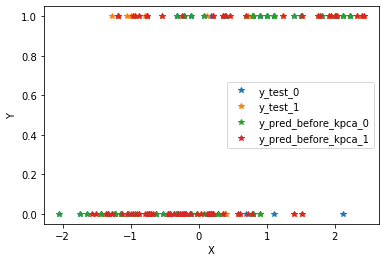

In [135]:
plt.plot( x_test.T[0], y_test, linestyle = '', marker = '*', label = 'y_test_0' )
plt.plot( x_test.T[1], y_test, linestyle = '', marker = '*', label = 'y_test_1' )
plt.plot( x_test.T[0], y_pred_before_kpca, linestyle = '', marker = '*', label = 'y_pred_before_kpca_0' )
plt.plot( x_test.T[1], y_pred_before_kpca, linestyle = '', marker = '*', label = 'y_pred_before_kpca_1' )
plt.xlabel( 'X' )
plt.ylabel('Y')
plt.legend( loc = 'best' )
plt.show()

In [136]:
lr.score( x_test, y_test )

0.8375

In [137]:
from sklearn.metrics import confusion_matrix

In [138]:
cm = confusion_matrix( y_test, y_pred_before_kpca )

In [139]:
cm

array([[45,  6],
       [ 7, 22]], dtype=int64)

In [140]:
correct = cm[0][0] + cm[1][1]
wrong = cm[0][1] + cm[1][0]

In [141]:
print( f"correct = { correct }" )
print( f"wrong = { wrong }" )

correct = 67
wrong = 13


In [142]:
accuracy_percent = correct/( correct + wrong )

print( f"Accuracy % = { accuracy_percent * 100}" )

Accuracy % = 83.75


In [143]:
from sklearn.decomposition import KernelPCA

In [144]:
kpca = KernelPCA( n_components = 2, kernel = 'rbf' )        #n_components is the number of columns getting trained

In [157]:
x_train = kpca.fit_transform( x_train )
x_test = kpca.fit_transform( x_test )

In [158]:
x_train

array([[-0.19952509, -0.02935159],
       [-0.31836161, -0.09934397],
       [ 0.42504055,  0.1679796 ],
       [-0.30149176,  0.36537465],
       [ 0.24803891, -0.36971365],
       [ 0.3084115 ,  0.41794927],
       [ 0.06612025, -0.42330653],
       [-0.26039307, -0.18522327],
       [ 0.14702113, -0.34818496],
       [ 0.37858539,  0.34313707],
       [ 0.45592089,  0.23318855],
       [-0.02678856, -0.42843593],
       [ 0.08416913, -0.23432733],
       [ 0.25333158, -0.37530516],
       [ 0.01968059, -0.23280625],
       [-0.32961037,  0.27504901],
       [ 0.3202696 , -0.23782428],
       [-0.02614972,  0.43589399],
       [ 0.37603805, -0.12463722],
       [-0.27725143,  0.08222699],
       [ 0.13927943, -0.244429  ],
       [ 0.27684644,  0.42222363],
       [-0.12863486, -0.34768709],
       [ 0.17508494, -0.39076502],
       [-0.39099431, -0.10462584],
       [-0.33759942,  0.31297736],
       [ 0.35480012, -0.21819153],
       [ 0.36589802, -0.23311964],
       [-0.17908547,

In [159]:
x_test

array([[-1.38959801e-01, -2.98122967e-01],
       [-3.67423467e-01,  3.63957236e-02],
       [-3.58029349e-01,  1.50899503e-01],
       [ 3.81444439e-01,  1.61462137e-01],
       [-1.99071860e-01, -1.20927132e-01],
       [ 3.83828446e-01,  1.30993773e-01],
       [-4.24467860e-01, -6.10410381e-02],
       [ 3.75341909e-01,  2.32808015e-02],
       [ 4.30085551e-01,  7.18726980e-03],
       [-3.27211093e-01, -5.34658000e-03],
       [-4.49796814e-01, -7.33303062e-02],
       [ 4.03603906e-01,  1.07770502e-01],
       [ 1.52803629e-01, -3.29032569e-01],
       [ 4.20322273e-01, -1.97502474e-01],
       [-4.41444004e-01, -9.28825948e-02],
       [ 1.44442783e-01, -1.84406087e-01],
       [-2.01093982e-01, -1.37930572e-01],
       [ 1.26669085e-01,  4.49943834e-01],
       [ 1.29120004e-01,  4.06774292e-01],
       [-3.82889217e-01, -1.25681806e-01],
       [ 3.38314299e-01,  2.30303853e-01],
       [ 1.27114228e-01,  3.78050505e-01],
       [ 4.23135010e-01, -1.67988099e-01],
       [-4.

In [160]:
lr = LogisticRegression()

In [161]:
lr.fit(x_train, y_train)

C:\Users\gauta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
y_pred_after_kpca = lr.predict( y_test )
y_pred_after_kpca

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0
 0 0 0 0 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [173]:
y_test = pd.DataFrame( y_test )
y_test

,Purchased
319,0
178,0
76,0
321,1
98,0
...,...
133,0
225,0
114,0
395,1


In [175]:
y_pred_after_kpca = lr.predict( y_test )
y_pred_after_kpca

ValueError: X has 1 features per sample; expecting 2